In [27]:
import pandas as pd
import csv
import numpy as np
from ast import literal_eval
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor



from sklearn.metrics import mean_squared_error


In [36]:
df = pd.read_csv('res2.csv', sep='|', quoting=csv.QUOTE_NONE)
#print(df.count())

replacement_dict = {'t': 1, 'f': 0, np.nan: 2}
df['predict_label'] = df['predict_label'].map(replacement_dict)
df.drop(['true_label'],axis=1,inplace=True)
df.loc[df.predict_label == 0, 'predict_proba'] *= -1
df['predict_proba'] = (df['predict_proba'] /2 ) + 0.5
df.drop_duplicates(subset=['statement_id'], inplace=True)




In [5]:
df1  = pd.read_csv('test1.csv')

df1['text_embedding'] = df1['text_embedding'].apply(lambda x: x.replace("[","").replace("]",""))

df1['text_embedding'] = df1['text_embedding'].apply(lambda x: np.array(x.split(',')).astype('float'))

df1.count()

id                148
text              148
text_embedding    148
predict_label     148
dtype: int64

In [17]:
df3 = pd.merge(df, df1, left_on='statement_id', right_on='id', how='inner')
df3 = df3[['id','text_embedding','predict_proba']]
df3

,id,text_embedding,predict_proba
0,11,"[-0.0037622011732310057, -0.009564809501171112...",0.971363
1,2,"[0.00682240491732955, -0.010535278357565403, 0...",0.113183
2,1,"[0.001223430735990405, -0.016094623133540154, ...",0.949307
3,111,"[0.012213649228215218, -0.005613277200609446, ...",0.240904
4,112,"[-0.009499719366431236, 0.010667282156646252, ...",0.059442
5,114,"[-0.0009792572818696499, -0.01856430433690548,...",0.853409
6,87,"[0.007282370235770941, -0.002500670962035656, ...",0.877171
7,3,"[0.010850735008716583, -0.021955367177724838, ...",0.062490
8,59,"[0.019055191427469254, -0.00390984769910574, 0...",0.934091
9,32,"[-0.009226775728166103, -0.018774714320898056,...",0.049240


In [19]:
arr = np.concatenate(np.array(df3.loc[:,'text_embedding']))

arr = arr.reshape((len(df3),1536))



In [13]:
X_train, X_test, y_train, y_test = train_test_split(arr, df3.predict_proba, test_size=0.2, random_state=42)


Mean Squared Error: 0.1658139627972303


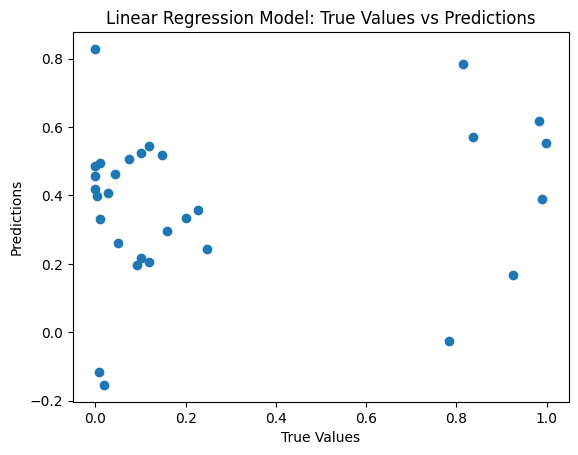

In [28]:
# Create a linear regression model
model = LinearRegression()

# Train the model on the training data
model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

# Plot predicted vs true values
plt.scatter(y_test, y_pred)
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.title('Linear Regression Model: True Values vs Predictions')
plt.show()

Decision Tree Regression Mean Squared Error: 0.2711650296098185


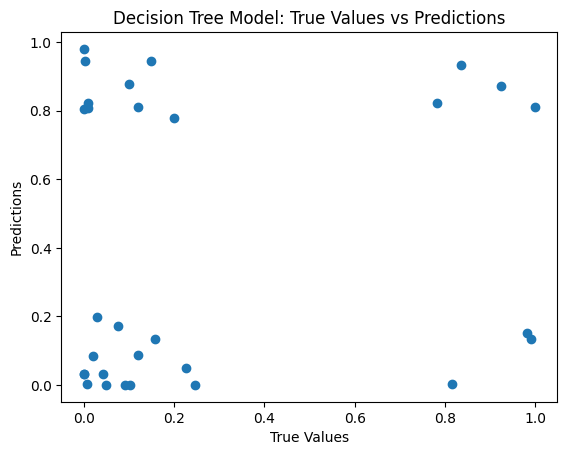

In [35]:
# Create a Decision Tree regression model



tree_model = DecisionTreeRegressor()

# Train the model on the training data
tree_model.fit(X_train, y_train)

# Make predictions on the test data
y_pred_tree = tree_model.predict(X_test)

# Evaluate the model
mse_tree = mean_squared_error(y_test, y_pred_tree)
print(f'Decision Tree Regression Mean Squared Error: {mse_tree}')


# Plot the data 
plt.scatter(y_test, y_pred_tree)
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.title('Decision Tree Model: True Values vs Predictions')
plt.show()

Random Forest Regression Mean Squared Error: 0.12782480840173033


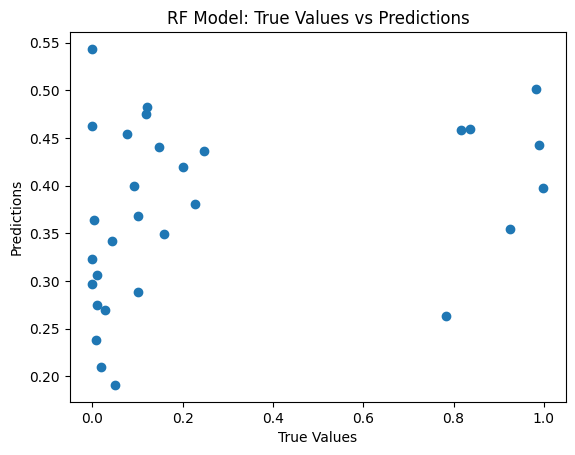

In [34]:
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)
mse_rf = mean_squared_error(y_test, y_pred_rf)
print(f'Random Forest Regression Mean Squared Error: {mse_rf}')

# Plot the data 
plt.scatter(y_test, y_pred_rf)
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.title('RF Model: True Values vs Predictions')
plt.show()

SVM Regression Mean Squared Error: 0.11833744391856582


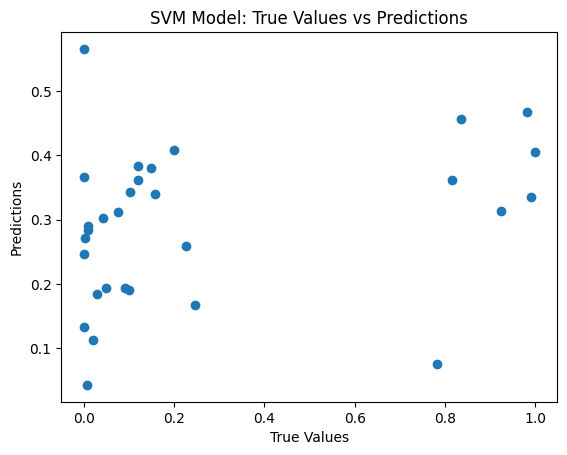

In [33]:
# Create an SVM regression model
svm_model = SVR(kernel='linear')  # You can choose different kernels such as 'linear', 'rbf', etc.

# Train the model on the training data
svm_model.fit(X_train, y_train)

# Make predictions on the test data
y_pred_svm = svm_model.predict(X_test)

# Evaluate the model
mse_svm = mean_squared_error(y_test, y_pred_svm)
print(f'SVM Regression Mean Squared Error: {mse_svm}')


# Plot the data 
plt.scatter(y_test, y_pred_svm)
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.title('SVM Model: True Values vs Predictions')
plt.show()

k-NN Regression Mean Squared Error: 0.09270127174558594


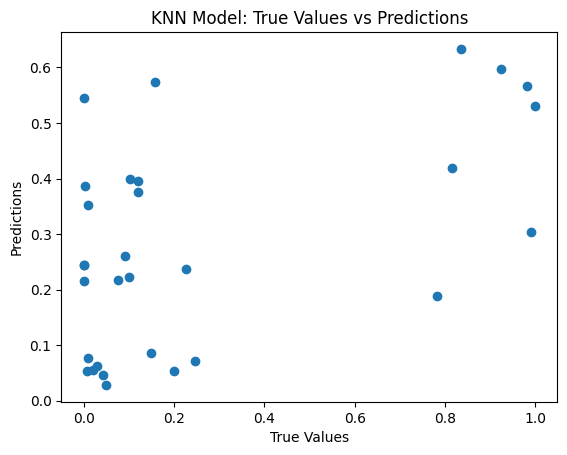

In [32]:
knn_model = KNeighborsRegressor(n_neighbors=5)  # You can adjust the number of neighbors (k)
knn_model.fit(X_train, y_train)
y_pred_knn = knn_model.predict(X_test)

# Evaluate the model
mse_knn = mean_squared_error(y_test, y_pred_knn)
print(f'k-NN Regression Mean Squared Error: {mse_knn}')

# Plot the data and the k-NN regression curve
plt.scatter(y_test, y_pred_knn)
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.title('KNN Model: True Values vs Predictions')
plt.show()